# Preliminaries

In [31]:
import os
#os.environ["PATH"]="/opt/conda/envs/python2/bin:"+os.environ["PATH"]

Check the version of Python being used. 

In [32]:
!python --version

Python 2.7.12


Specify the parent directory where you want to store the Cactus directory. Once Cactus is built, its contents cannot be easily moved without breaking things. If the Cactus directory is later moved, one has to repeat the following steps to rebuild it from its new location.

In [5]:
etk_dir = '/home/ejwest/ETK'

Change the working directory to the parent directory specified above.

In [6]:
%cd $etk_dir

/home/ejwest/ETK


![cactus](http://cactuscode.org/global/images/cactuslogo.png)

# Compiling Cactus!

Step 1 is to download the code. Cactus uses a script named "GetComponents" to find and prepare all the source code modules that it needs for a given installation. The GetComponents script can be downloaded with a simple invocation of curl. To download, uncomment and execute the following lines.

In [7]:
#%cd $etk_dir
#!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

Step 2 is to download your thornlist. In this tutorial, we are going to use the Einstein Toolkit, a collection of thorns designed to solve the Einstein equations numerically. To download the Einstein Toolkit thornlist, uncomment and execute the following lines.

In [8]:
#%cd $etk_dir
#!curl -kLO https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2018_02/einsteintoolkit.th

You can view a file in the notebook by using the "magic" command "%pycat filename". However, %pycat tries to highlight syntax as if the file is written in python. In those cases you can simply use "%cat filename." Unfortunately, unlike %pycat, %cat leaves the contents of the file on the screen.

To view the downloaded thornlist using %pycat, uncomment and execute the following lines. Note that at the top of the file is "DEFINE_ROOT = Cactus". This means that Cactus, and all its thorns, will be checked out under that directory.

In [39]:
%cd $etk_dir
%pycat einsteintoolkit.th

/home/ejwest/ETK


Step 3 is to checkout the components listed in the thornlist. We do this with the GetComponents command.
Before we can execute it, however, we need to turn on its execute bit. To run GetComponents, uncomment and execute the following lines.

In [11]:
#%cd $etk_dir
#!chmod a+x GetComponents
#!echo no|./GetComponents --update einsteintoolkit.th

In what follows, it will be useful to have a shortcut variable for the Cactus directory. All simulations are launched from this directory. To create a shrtcut variable, edit and execute the following line.

In [12]:
cactus_dir = '/home/ejwest/ETK/Cactus'

Move to the Cactus directory.

In [13]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


<img src="http://simfactory.org/global/images/factory.png" width="200px">

# Simfactory
Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. To configure Simfactory, edit and execute the following lines. Replace the email address in the command below with yours. The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.

In [14]:
#%cd $cactus_dir
#!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu 

This has created a user configuration file. This file contains contains defaults that are used any time you run simfactory. In addition, a machine-specific configuration file has been created in teh machine database (mdb). This file is located in "simfactory/mdb/machines". Your machine name can be identified using the following.

In [15]:
!hostname

newton


Next create a shortcut variable for the mdb file. Change the name of the .ini file in the path below to your machine name, returned by the hostname command above.

In [17]:
mdb_file = './simfactory/mdb/machines/newton.ini'
!echo $mdb_file

./simfactory/mdb/machines/newton.ini


One of the things you may want to change in your mdb file is the directory where simulation output data are dumped. By default, a folder named "simulations" is created in your home directory for this purpose. If you want output data to be printed elsewhere, change the "basedir" entry in the mdb file. You may also want to change "ppn", "max-num-threads", and "num-threads" to the number of physical cores on your machine. If you machine supports hyperthreading, add a line "num-smt = 2".

To view the mdb file using %pycat, uncomment and execute the following lines.

In [18]:
#%cd $cactus_dir
#%pycat $mdb_file

To load the mdb file for your machine, uncomment and execute the following line.

In [19]:
#%load $mdb_file

Cut and paste the file contents above into the following cell, adding the magic command "%%writefile $mdb_file" at the top. This allows you to edit the mdb file directly from the notebook interface. When your edits are finished, execute the cell. The contents will overwrite your machine's mdb file.

In [20]:
#%%writefile $mdb_file

At long last, we are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand (you can do this by adding --optionlist=centos.cfg to the build command below). The file containing
this information is called the Option List. You might want to take a look at it.

To start from a clean slate and remove any previous configurations, uncomment and execute the following lines.

In [21]:
#%cd $cactus_dir
#!rm -rf configs

This is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the -j option does. If all goes well, this step takes a while. Go get a coffee and come back in 30 minutes or so! To proceed to build Cactus, uncomment and execute the following lines.

In [22]:
#%cd $cactus_dir
#!time ./simfactory/bin/sim build -j2 --thornlist=thornlists/einsteintoolkit.th 

The build command creates a configuration called "sim". It is found in the "configs/sim" directory. Let's move to this directory and list its contents.

In [40]:
%cd $cactus_dir/configs/sim
%ls

/home/ejwest/ETK/Cactus/configs/sim
BUILD-ID    SubmitScript  config-data/    lib/
CONFIG-ID   ThornList     config-info     piraha/
OptionList  bindings/     configjar.git/  properties.ini
RunScript   build/        datestamp.o     scratch/


Notice that one of the files in this directory is the ThornList. It contains the list of thorns Cactus will compile. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. 
However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk! To view the current ThornList using %pycat, uncomment and execute the following line.

In [41]:
%pycat ThornList

The "OptionList" file contains all the configuration options (the things you saw in centos.cfg). Unlike the ThornList file, however, changing this file will have no effect. If you wish to change your configuration options without starting over from scratch, you should edit the file "configs/sim/config-data/make.config.defn." To view this file using %pycat, uncomment and execute the following line.

In [42]:
%pycat config-data/make.config.defn

# Running Cactus!

Finally, let's run Cactus. First move to the Cactus directory.

In [33]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


Below we are going to run a simulation that solves the TOV equations for a static neutron star. We will use MPI and run on two processes. You can edit the parameter file below and hit shift-Enter to write it to disk. The special sequence "%%writefile filename" at the top makes this possible. Alternatively, you can load an existing file by putting the special sequence "%load filename" at the top of a cell and hitting shift-Enter.

In [17]:
%%writefile par/static_tov_small.par
## mclachlan tov_static
ActiveThorns = "Time MoL"
ActiveThorns = "Coordbase CartGrid3d Boundary StaticConformal"
ActiveThorns = "SymBase ADMBase TmunuBase HydroBase InitBase ADMCoupling ADMMacros"
ActiveThorns = "IOUtil Formaline"
ActiveThorns = "SpaceMask CoordGauge Constants LocalReduce aeilocalinterp LoopControl"
ActiveThorns = "Carpet CarpetLib CarpetReduce CarpetRegrid2 CarpetInterp"
ActiveThorns = "CarpetIOASCII CarpetIOScalar CarpetIOHDF5 CarpetIOBasic"

ActiveThorns = "ML_ADMConstraints NaNChecker"

# grid parameters
CartGrid3D::type         = "coordbase"
CartGrid3D::domain       = "full"
CartGrid3D::avoid_origin = "no"
CoordBase::xmin =   0.0
CoordBase::ymin =   0.0
CoordBase::zmin =   0.0
CoordBase::xmax = 240.0
CoordBase::ymax = 240.0
CoordBase::zmax = 240.0
CoordBase::dx   =   12
CoordBase::dy   =   12
CoordBase::dz   =   12

CoordBase::boundary_size_x_lower        = 3
CoordBase::boundary_size_y_lower        = 3
CoordBase::boundary_size_z_lower        = 3
CoordBase::boundary_size_x_upper        = 3
CoordBase::boundary_size_y_upper        = 3
CoordBase::boundary_size_z_upper        = 3
CoordBase::boundary_shiftout_x_lower    = 1
CoordBase::boundary_shiftout_y_lower    = 1
CoordBase::boundary_shiftout_z_lower    = 1
CoordBase::boundary_shiftout_x_upper    = 0
CoordBase::boundary_shiftout_y_upper    = 0
CoordBase::boundary_shiftout_z_upper    = 0




ActiveThorns = "ReflectionSymmetry"

ReflectionSymmetry::reflection_x = "yes"
ReflectionSymmetry::reflection_y = "yes"
ReflectionSymmetry::reflection_z = "yes"
ReflectionSymmetry::avoid_origin_x = "no"
ReflectionSymmetry::avoid_origin_y = "no"
ReflectionSymmetry::avoid_origin_z = "no"



TmunuBase::stress_energy_storage = yes
TmunuBase::stress_energy_at_RHS  = yes
TmunuBase::timelevels            =  1
TmunuBase::prolongation_type     = none

HydroBase::timelevels            = 3

ADMMacros::spatial_order = 4

ADMBase::metric_type     = "physical"

ML_ADMConstraints::timelevels = 3

SpaceMask::use_mask      = "yes"

Cactus::terminate           = "time"
Cactus::cctk_final_time     = 1000

Carpet::domain_from_coordbase = "yes"
Carpet::enable_all_storage       = no
Carpet::use_buffer_zones         = "yes"

Carpet::poison_new_timelevels    = "yes"
Carpet::check_for_poison         = "no"
Carpet::poison_value             = 113

Carpet::init_3_timelevels        = no
Carpet::init_fill_timelevels     = "yes"

CarpetLib::poison_new_memory = "yes"
CarpetLib::poison_value      = 114

# system specific Carpet paramters
Carpet::max_refinement_levels    = 10
driver::ghost_size               = 3
Carpet::prolongation_order_space = 3
Carpet::prolongation_order_time  = 2

CarpetRegrid2::regrid_every = 0
CarpetRegrid2::num_centres  = 1

CarpetRegrid2::num_levels_1 = 5
CarpetRegrid2::radius_1[1]  =120.0
CarpetRegrid2::radius_1[2]  = 60.0
CarpetRegrid2::radius_1[3]  = 30.0
CarpetRegrid2::radius_1[4]  = 15.0


time::dtfac = 0.25
MoL::ODE_Method             = "rk4"
MoL::MoL_Intermediate_Steps = 4
MoL::MoL_Num_Scratch_Levels = 1

# check all physical variables for NaNs
NaNChecker::check_every = 1
NaNChecker::action_if_found = "just warn" #"terminate", "just warn", "abort"
NaNChecker::check_vars = "ADMBase::metric ADMBase::lapse ADMBase::shift HydroBase::rho HydroBase::eps HydroBase::press HydroBase::vel"

## Lapse Condition:  \partial_t alpha = - alpha K
## Shift Condition:  \partial_t beta^i = 0

# Hydro paramters
ActiveThorns = "EOS_Omni"
ActiveThorns = "GRHydro"

HydroBase::evolution_method      = "GRHydro"

GRHydro::riemann_solver            = "Marquina"
GRHydro::GRHydro_eos_type           = "Polytype"
GRHydro::GRHydro_eos_table          = "2D_Polytrope"
GRHydro::recon_method              = "ppm"
GRHydro::GRHydro_stencil            = 3
GRHydro::bound                     = "none"
GRHydro::rho_abs_min               = 1.e-10
#GRHydro::GRHydro = 18 # Tmunu(10), rho,press,eps,w_lorentz,vel, tau
#GRHydro::GRHydro    = 10    # gij(6), alpha, beta(3)


ActiveThorns = "GenericFD NewRad"
ActiveThorns = "ML_BSSN ML_BSSN_Helper"
ADMBase::evolution_method        = "ML_BSSN"
ADMBase::lapse_evolution_method  = "ML_BSSN"
ADMBase::shift_evolution_method  = "ML_BSSN"
ADMBase::dtlapse_evolution_method= "ML_BSSN"
ADMBase::dtshift_evolution_method= "ML_BSSN"

ML_BSSN::timelevels = 3

ML_BSSN::harmonicN           = 1      # 1+log
ML_BSSN::harmonicF           = 1.0    # 1+log
ML_BSSN::evolveA             = 1
ML_BSSN::evolveB             = 0
ML_BSSN::ShiftGammaCoeff     = 0.0
ML_BSSN::AlphaDriver         = 0.0
ML_BSSN::BetaDriver          = 0.0
ML_BSSN::advectLapse         = 0
ML_BSSN::advectShift         = 0

ML_BSSN::MinimumLapse        = 1.0e-8

ML_BSSN::initial_boundary_condition = "extrapolate-gammas"
ML_BSSN::rhs_boundary_condition     = "NewRad"

ML_BSSN::ML_log_confac_bound = "none"
ML_BSSN::ML_metric_bound     = "none"
ML_BSSN::ML_Gamma_bound      = "none"
ML_BSSN::ML_trace_curv_bound = "none"
ML_BSSN::ML_curv_bound       = "none"
ML_BSSN::ML_lapse_bound      = "none"
ML_BSSN::ML_dtlapse_bound    = "none"
ML_BSSN::ML_shift_bound      = "none"
ML_BSSN::ML_dtshift_bound    = "none"



# init parameters
InitBase::initial_data_setup_method = "init_some_levels"

ActiveThorns = "TOVSolver"

ADMBase::initial_data            = "tov"
ADMBase::initial_lapse           = "tov"
ADMBase::initial_shift           = "tov"
ADMBase::initial_dtlapse         = "zero"
ADMBase::initial_dtshift         = "zero"

TOVSolver::TOV_Rho_Central[0] = 1.28e-3
TOVSolver::TOV_Gamma          = 2.0
TOVSolver::TOV_K              = 100.0


IOBasic::outInfo_every              = 1
IOBasic::outInfo_vars               = "HydroBase::rho ADMBase::lapse"

IO::out_dir      = $parfile

IOScalar::outScalar_every = 32
IOScalar::one_file_per_group = yes
IOScalar::outScalar_vars  = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"

IOASCII::out1D_every     = 256
IOASCII::one_file_per_group = yes
IOASCII::output_symmetry_points = no
IOASCII::out3D_ghosts           = no
IOASCII::out3D_outer_ghosts     = no
IOASCII::out1D_vars      = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"


Overwriting par/static_tov_small.par


Next create a shortcut variable for the directory where simulation output data is dumped. To do this, edit and execute the following line.

In [59]:
sim_dir = '/home/ejwest/ETK/simulations'

To delete any old versions of the simulation and start over again, uncomment and execute the following line.

In [64]:
!rm -rf $sim_dir/static_tov_small

At long last, we are ready run Cactus. This configuration specifies running on two threads, with 1 thread per process. To execute this command, Cactus uses a "RunScript" stored in configs/sim/RunScript. You might want to take a look at it. Identifiers sandwiched between @ symbols get replaced by Simfactory prior to execution. To view the RunScript using %pycat, uncomment and execute the following lines.

In [65]:
#%pycat $cactus_dir/configs/sim/RunScript

Enough already! Let's run Cactus! We are creating a new simulation called "static_tov_small", using the above parfile, and the specified number of processes. Set procs equal to the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores). To run, uncomment and execute the following lines. The simulation make take several hours to finish.

In [66]:
%cd $cactus_dir
!./simfactory/bin/sim create-run static_tov_small --parfile=par/static_tov_small.par --procs=2

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/par/static_tov_small.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/static_tov_small"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/par/static_tov_small.par"
Simulation name: static_tov_small
Assigned restart id: 0 
Running simulation static_tov_small
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ hostname
newton
+ date
Sat Apr 21 01:31:39 CDT 2018
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_NU

INFO (Carpet): Multi-Model listing:
   model 0: "world"
INFO (Carpet): Multi-Model process distribution:
   process 0: model 0 "world"
INFO (Carpet): Multi-Model: This is process 0, model 0 "world"
INFO (CarpetLib): Process startup time was 1.38 seconds
Current core file size limit: hard=[unlimited], soft=0 MB
Current memory size limit: hard=[unlimited], soft=[unlimited]
INFO (CycleClock): Measuring CycleClock tick via OpenMP...
INFO (CycleClock): Calibrated CycleClock: 0.303697 ns per clock tick (3.29275 GHz)
INFO (Formaline): Configuration id: config-sim-newton-home-ejwest-ETK-Cactus
INFO (Formaline): Build id: build-sim-newton-ejwest-2018.04.09-14.43.34-32328
INFO (Formaline): Simulation id: run-static_tov_small-newton-ejwest-2018.04.21-06.31.40-17522
INFO (Formaline): Run id: run-static_tov_small-newton-ejwest-2018.04.21-06.31.40-17522
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
-----------------------------------------------------------------------

INFO (Carpet): Grid structure (superregions, grid points):
   [0][0][0]   exterior: [0,0,0] : [25,25,25]   ([26,26,26] + PADDING) 17576
   [1][0][0]   exterior: [3,3,3] : [37,37,37]   ([35,35,35] + PADDING) 42875
   [2][0][0]   exterior: [9,9,9] : [43,43,43]   ([35,35,35] + PADDING) 42875
   [3][0][0]   exterior: [21,21,21] : [54,54,54]   ([34,34,34] + PADDING) 39304
   [4][0][0]   exterior: [45,45,45] : [77,77,77]   ([33,33,33] + PADDING) 35937
INFO (Carpet): Grid structure (superregions, coordinates):
   [0][0][0]   exterior: [-36.000000000000000,-36.000000000000000,-36.000000000000000] : [264.000000000000000,264.000000000000000,264.000000000000000] : [12.000000000000000,12.000000000000000,12.000000000000000]
   [1][0][0]   exterior: [-18.000000000000000,-18.000000000000000,-18.000000000000000] : [186.000000000000000,186.000000000000000,186.000000000000000] : [6.000000000000000,6.000000000000000,6.000000000000000]
   [2][0][0]   exterior: [-9.000000000000000,-9.000000000000000,-9.000

     1312     7.688 |    0.6701278    0.9966375 | 9.996707e-11    0.0012622
     1344     7.875 |    0.6701379    0.9966375 | 9.999455e-11    0.0012622
     1376     8.062 |    0.6701488    0.9966375 | 9.996799e-11    0.0012623
     1408     8.250 |    0.6701606    0.9966375 | 9.999928e-11    0.0012623
     1440     8.438 |    0.6701734    0.9966375 | 9.994016e-11    0.0012623
     1472     8.625 |    0.6701870    0.9966375 | 9.999302e-11    0.0012624
     1504     8.812 |    0.6702014    0.9966375 | 9.997715e-11    0.0012624
     1536     9.000 |    0.6702165    0.9966375 | 1.000000e-10    0.0012624
     1568     9.188 |    0.6702321    0.9966375 | 9.997716e-11    0.0012624
     1600     9.375 |    0.6702479    0.9966375 | 9.999492e-11    0.0012624
     1632     9.562 |    0.6702639    0.9966375 | 9.994014e-11    0.0012624
     1664     9.750 |    0.6702799    0.9966375 | 9.999812e-11    0.0012623
     1696     9.938 |    0.6702958    0.9966375 | 9.996668e-11    0.0012623
     1728   

     4160    24.375 |    0.6727066    0.9966376 | 9.998349e-11    0.0012429
     4192    24.562 |    0.6727483    0.9966376 | 9.990534e-11    0.0012426
     4224    24.750 |    0.6727902    0.9966376 | 9.999488e-11    0.0012423
     4256    24.938 |    0.6728322    0.9966376 | 9.981094e-11    0.0012420
     4288    25.125 |    0.6728740    0.9966376 | 9.998463e-11    0.0012418
     4320    25.312 |    0.6729154    0.9966376 | 9.988160e-11    0.0012415
     4352    25.500 |    0.6729565    0.9966376 | 9.999863e-11    0.0012412
     4384    25.688 |    0.6729973    0.9966376 | 9.984541e-11    0.0012409
     4416    25.875 |    0.6730382    0.9966376 | 9.998510e-11    0.0012406
     4448    26.062 |    0.6730795    0.9966376 | 9.994634e-11    0.0012403
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

     7008    41.062 |    0.6772139    0.9966377 | 9.991703e-11    0.0012035
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
     7040    41.250 |    0.6772643    0.9966377 | 9.998280e-11    0.0012030
     7072    41.438 |    0.6773139    0.9966377 | 9.989001e-11    0.0012025
     7104    41.625 |    0.6773628    0.9966377 | 9.996937e-11    0.0012020
     7136    41.812 |    0.6774111    0.9966377 | 9.989126e-11    0.0012015
     7168    42.000 |    0.6774590    0.9966377 | 1.000000e-10    0.0012011
     7200    42.188 |    0.6775067    0.9966377 | 9.990313e-11    0.0012006
     7232    42.375 |    0.6775544    0.9966377 | 9.997427e-11    0.0012001
     7264    42.562 |    0.6776022    0.9966377 | 9.979356e-11    0.0011997
     7296   

     9728    57.000 |    0.6799743    0.9966378 | 1.000000e-10    0.0011837
     9760    57.188 |    0.6799896    0.9966378 | 9.975300e-11    0.0011837
     9792    57.375 |    0.6800037    0.9966378 | 9.996814e-11    0.0011836
     9824    57.562 |    0.6800168    0.9966378 | 9.980512e-11    0.0011836
     9856    57.750 |    0.6800288    0.9966378 | 9.998227e-11    0.0011836
     9888    57.938 |    0.6800399    0.9966378 | 9.979408e-11    0.0011835
     9920    58.125 |    0.6800503    0.9966378 | 9.996425e-11    0.0011835
     9952    58.312 |    0.6800602    0.9966378 | 9.984110e-11    0.0011835
     9984    58.500 |    0.6800700    0.9966378 | 9.999620e-11    0.0011834
    10016    58.688 |    0.6800797    0.9966378 | 9.980953e-11    0.0011834
    10048    58.875 |    0.6800896    0.9966378 | 9.997404e-11    0.0011834
    10080    59.062 |    0.6800998    0.9966378 | 9.981326e-11    0.0011834
    10112    59.250 |    0.6801102    0.9966378 | 9.998578e-11    0.0011834
    10144   

    12672    74.250 |    0.6800198    0.9966378 | 9.998987e-11    0.0011870
    12704    74.438 |    0.6800086    0.9966378 | 9.984406e-11    0.0011871
    12736    74.625 |    0.6799965    0.9966378 | 9.994322e-11    0.0011872
    12768    74.812 |    0.6799838    0.9966378 | 9.964109e-11    0.0011873
INFO (CarpetIOHDF5): ---------------------------------------------------------
INFO (CarpetIOHDF5): Dumping periodic checkpoint at iteration 12800, simulation time 75
INFO (CarpetIOHDF5): ---------------------------------------------------------
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    12800    75.000 |    0.6799706    0.9966378 | 1.000000e-10    0.0011874
    12832    75.188 |    0.6799574    0.9966378 | 9.956178e-11    0.00

    15392    90.188 |    0.6783203    0.9966377 | 9.962289e-11    0.0011998
    15424    90.375 |    0.6782928    0.9966377 | 9.995464e-11    0.0012001
    15456    90.562 |    0.6782658    0.9966377 | 9.956512e-11    0.0012003
    15488    90.750 |    0.6782391    0.9966377 | 9.995926e-11    0.0012005
    15520    90.938 |    0.6782125    0.9966377 | 9.984659e-11    0.0012007
    15552    91.125 |    0.6781855    0.9966377 | 9.994267e-11    0.0012009
    15584    91.312 |    0.6781579    0.9966377 | 9.978354e-11    0.0012012
    15616    91.500 |    0.6781294    0.9966377 | 9.998937e-11    0.0012014
    15648    91.688 |    0.6780998    0.9966377 | 9.980986e-11    0.0012016
    15680    91.875 |    0.6780690    0.9966377 | 9.993170e-11    0.0012019
    15712    92.062 |    0.6780372    0.9966377 | 9.958211e-11    0.0012021
    15744    92.250 |    0.6780047    0.9966377 | 9.997960e-11    0.0012023
    15776    92.438 |    0.6779717    0.9966377 | 9.947024e-11    0.0012026
    15808   

    18240   106.875 |    0.6753141    0.9966377 | 9.992822e-11    0.0012237
    18272   107.062 |    0.6752798    0.9966377 | 9.959761e-11    0.0012239
    18304   107.250 |    0.6752458    0.9966377 | 9.998494e-11    0.0012242
    18336   107.438 |    0.6752118    0.9966377 | 9.944740e-11    0.0012245
    18368   107.625 |    0.6751774    0.9966377 | 9.992517e-11    0.0012248
    18400   107.812 |    0.6751424    0.9966377 | 9.962972e-11    0.0012251
    18432   108.000 |    0.6751065    0.9966377 | 1.000000e-10    0.0012254
    18464   108.188 |    0.6750697    0.9966377 | 9.976862e-11    0.0012257
    18496   108.375 |    0.6750320    0.9966377 | 9.993798e-11    0.0012260
    18528   108.562 |    0.6749938    0.9966377 | 9.954464e-11    0.0012263
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

    21088   123.562 |    0.6724734    0.9966376 | 9.959060e-11    0.0012464
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    21120   123.750 |    0.6724490    0.9966376 | 9.997780e-11    0.0012466
    21152   123.938 |    0.6724252    0.9966376 | 9.976991e-11    0.0012467
    21184   124.125 |    0.6724018    0.9966375 | 9.993882e-11    0.0012469
    21216   124.312 |    0.6723789    0.9966375 | 9.951215e-11    0.0012471
    21248   124.500 |    0.6723564    0.9966375 | 9.998399e-11    0.0012473
    21280   124.688 |    0.6723341    0.9966375 | 9.937429e-11    0.0012474
    21312   124.875 |    0.6723121    0.9966375 | 9.990863e-11    0.0012476
    21344   125.062 |    0.6722903    0.9966375 | 9.950346e-11    0.0012478
    21376   

    23808   139.500 |    0.6714804    0.9966374 | 9.998824e-11    0.0012527
    23840   139.688 |    0.6714833    0.9966374 | 9.957123e-11    0.0012527
    23872   139.875 |    0.6714861    0.9966374 | 9.993844e-11    0.0012526
    23904   140.062 |    0.6714887    0.9966374 | 9.939349e-11    0.0012526
    23936   140.250 |    0.6714910    0.9966374 | 9.996066e-11    0.0012525
    23968   140.438 |    0.6714930    0.9966374 | 9.947962e-11    0.0012525
    24000   140.625 |    0.6714950    0.9966374 | 9.993169e-11    0.0012525
    24032   140.812 |    0.6714970    0.9966374 | 9.980038e-11    0.0012524
    24064   141.000 |    0.6714993    0.9966374 | 1.000000e-10    0.0012524
    24096   141.188 |    0.6715021    0.9966374 | 9.948032e-11    0.0012523
    24128   141.375 |    0.6715056    0.9966374 | 9.988430e-11    0.0012522
    24160   141.562 |    0.6715098    0.9966374 | 9.941334e-11    0.0012522
    24192   141.750 |    0.6715147    0.9966374 | 9.997001e-11    0.0012521
    24224   

    26656   156.188 |    0.6725411    0.9966372 | 9.942838e-11    0.0012423
    26688   156.375 |    0.6725613    0.9966372 | 9.993378e-11    0.0012421
    26720   156.562 |    0.6725816    0.9966372 | 9.966682e-11    0.0012419
    26752   156.750 |    0.6726022    0.9966372 | 9.996574e-11    0.0012418
    26784   156.938 |    0.6726234    0.9966372 | 9.947224e-11    0.0012416
    26816   157.125 |    0.6726450    0.9966372 | 9.991294e-11    0.0012414
    26848   157.312 |    0.6726673    0.9966372 | 9.965246e-11    0.0012412
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    26880   157.500 |    0.6726901    0.9966372 | 9.998282e-11    0.0012410
    26912   157.688 |    0.6727132    0.9966372 | 9.940847e-11    0.0012408
    26944   

    29472   172.688 |    0.6746767    0.9966371 | 9.977164e-11    0.0012248
    29504   172.875 |    0.6747024    0.9966370 | 9.990546e-11    0.0012246
    29536   173.062 |    0.6747280    0.9966370 | 9.966801e-11    0.0012244
    29568   173.250 |    0.6747537    0.9966370 | 9.997703e-11    0.0012242
    29600   173.438 |    0.6747794    0.9966370 | 9.952148e-11    0.0012240
    29632   173.625 |    0.6748051    0.9966370 | 9.987476e-11    0.0012238
    29664   173.812 |    0.6748309    0.9966370 | 9.949631e-11    0.0012236
    29696   174.000 |    0.6748568    0.9966370 | 1.000000e-10    0.0012234
    29728   174.188 |    0.6748827    0.9966370 | 9.962321e-11    0.0012232
    29760   174.375 |    0.6749086    0.9966370 | 9.992635e-11    0.0012230
    29792   174.562 |    0.6749344    0.9966370 | 9.952658e-11    0.0012228
    29824   174.750 |    0.6749600    0.9966370 | 9.997437e-11    0.0012226
    29856   174.938 |    0.6749854    0.9966370 | 9.957197e-11    0.0012224
    29888   

    32320   189.375 |    0.6767256    0.9966368 | 9.985879e-11    0.0012090
    32352   189.562 |    0.6767457    0.9966368 | 9.963335e-11    0.0012089
    32384   189.750 |    0.6767657    0.9966368 | 9.994259e-11    0.0012087
    32416   189.938 |    0.6767855    0.9966368 | 9.930620e-11    0.0012086
    32448   190.125 |    0.6768049    0.9966368 | 9.990731e-11    0.0012085
    32480   190.312 |    0.6768239    0.9966368 | 9.961240e-11    0.0012083
    32512   190.500 |    0.6768423    0.9966368 | 9.997309e-11    0.0012082
    32544   190.688 |    0.6768603    0.9966368 | 9.971300e-11    0.0012080
    32576   190.875 |    0.6768777    0.9966368 | 9.991263e-11    0.0012079
    32608   191.062 |    0.6768945    0.9966368 | 9.956950e-11    0.0012078
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    35200   206.250 |    0.6777438    0.9966366 | 9.997079e-11    0.0012014
    35232   206.438 |    0.6777471    0.9966366 | 9.957380e-11    0.0012014
    35264   206.625 |    0.6777502    0.9966366 | 9.986196e-11    0.0012013
    35296   206.812 |    0.6777528    0.9966366 | 9.958355e-11    0.0012013
    35328   207.000 |    0.6777550    0.9966366 | 1.000000e-10    0.0012013
    35360   207.188 |    0.6777570    0.9966366 | 9.968565e-11    0.0012013
    35392   207.375 |    0.6777586    0.9966366 | 9.984415e-11    0.0012013
    35424   207.562 |    0.6777600    0.9966366 | 9.934424e-11    0.0012013
    35456   207.750 |    0.6777612    0.9966366 | 9.997349e-11    0.0012013
    35488   

    38016   222.750 |    0.6772494    0.9966363 | 9.996994e-11    0.0012061
    38048   222.938 |    0.6772371    0.9966363 | 9.914764e-11    0.0012063
    38080   223.125 |    0.6772247    0.9966363 | 9.989771e-11    0.0012064
    38112   223.312 |    0.6772120    0.9966363 | 9.923248e-11    0.0012065
    38144   223.500 |    0.6771992    0.9966363 | 9.998942e-11    0.0012066
    38176   223.688 |    0.6771861    0.9966363 | 9.936444e-11    0.0012067
    38208   223.875 |    0.6771729    0.9966363 | 9.987775e-11    0.0012068
    38240   224.062 |    0.6771594    0.9966363 | 9.957942e-11    0.0012070
    38272   224.250 |    0.6771457    0.9966363 | 9.995943e-11    0.0012071
    38304   224.438 |    0.6771318    0.9966363 | 9.949611e-11    0.0012072
    38336   224.625 |    0.6771177    0.9966363 | 9.990543e-11    0.0012073
    38368   224.812 |    0.6771034    0.9966363 | 9.966445e-11    0.0012074
INFO (CarpetIOHDF5): ---------------------------------------------------------
INFO (Car

    40864   239.438 |    0.6756727    0.9966361 | 9.944276e-11    0.0012190
    40896   239.625 |    0.6756512    0.9966361 | 9.992852e-11    0.0012191
    40928   239.812 |    0.6756293    0.9966361 | 9.928041e-11    0.0012193
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    40960   240.000 |    0.6756072    0.9966361 | 1.000000e-10    0.0012195
    40992   240.188 |    0.6755851    0.9966361 | 9.947376e-11    0.0012196
    41024   240.375 |    0.6755633    0.9966361 | 9.988133e-11    0.0012198
    41056   240.562 |    0.6755418    0.9966361 | 9.957301e-11    0.0012200
    41088   240.750 |    0.6755208    0.9966361 | 9.996957e-11    0.0012201
    41120   240.938 |    0.6755006    0.9966361 | 9.928355e-11    0.0012203
    41152   

    43584   255.375 |    0.6739470    0.9966358 | 9.988437e-11    0.0012323
    43616   255.562 |    0.6739266    0.9966358 | 9.928736e-11    0.0012325
    43648   255.750 |    0.6739061    0.9966358 | 9.997193e-11    0.0012326
    43680   255.938 |    0.6738857    0.9966358 | 9.929284e-11    0.0012328
    43712   256.125 |    0.6738657    0.9966358 | 9.984944e-11    0.0012329
    43744   256.312 |    0.6738462    0.9966358 | 9.919795e-11    0.0012330
    43776   256.500 |    0.6738273    0.9966358 | 9.998860e-11    0.0012332
    43808   256.688 |    0.6738091    0.9966358 | 9.939229e-11    0.0012333
    43840   256.875 |    0.6737916    0.9966358 | 9.982297e-11    0.0012335
    43872   257.062 |    0.6737746    0.9966358 | 9.958035e-11    0.0012336
    43904   257.250 |    0.6737580    0.9966358 | 9.995118e-11    0.0012337
    43936   257.438 |    0.6737416    0.9966358 | 9.966913e-11    0.0012339
    43968   257.625 |    0.6737252    0.9966358 | 9.984816e-11    0.0012340
    44000   

    46432   272.062 |    0.6727252    0.9966355 | 9.937109e-11    0.0012415
    46464   272.250 |    0.6727176    0.9966355 | 9.992727e-11    0.0012415
    46496   272.438 |    0.6727109    0.9966355 | 9.959090e-11    0.0012416
    46528   272.625 |    0.6727049    0.9966355 | 9.985616e-11    0.0012416
    46560   272.812 |    0.6726995    0.9966355 | 9.928104e-11    0.0012417
    46592   273.000 |    0.6726944    0.9966355 | 1.000000e-10    0.0012417
    46624   273.188 |    0.6726894    0.9966355 | 9.957138e-11    0.0012417
    46656   273.375 |    0.6726841    0.9966355 | 9.983642e-11    0.0012418
    46688   273.562 |    0.6726785    0.9966355 | 9.962000e-11    0.0012418
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    46720   

---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    49280   288.750 |    0.6726910    0.9966353 | 9.996639e-11    0.0012408
    49312   288.938 |    0.6726965    0.9966353 | 9.938504e-11    0.0012407
    49344   289.125 |    0.6727019    0.9966353 | 9.977279e-11    0.0012406
    49376   289.312 |    0.6727074    0.9966353 | 9.962508e-11    0.0012406
    49408   289.500 |    0.6727130    0.9966353 | 9.998280e-11    0.0012405
    49440   289.688 |    0.6727190    0.9966353 | 9.914896e-11    0.0012404
    49472   289.875 |    0.6727254    0.9966353 | 9.976712e-11    0.0012404
    49504   290.062 |    0.6727321    0.9966353 | 9.957701e-11    0.0012403
    49536   290.250 |    0.6727393    0.9966353 | 9.994145e-11    0.0012402
    49568   

    52000   304.688 |    0.6735806    0.9966350 | 9.940275e-11    0.0012329
    52032   304.875 |    0.6735947    0.9966350 | 9.982210e-11    0.0012327
    52064   305.062 |    0.6736092    0.9966350 | 9.950807e-11    0.0012326
    52096   305.250 |    0.6736239    0.9966350 | 9.991932e-11    0.0012325
    52128   305.438 |    0.6736386    0.9966350 | 9.956147e-11    0.0012324
    52160   305.625 |    0.6736532    0.9966350 | 9.977525e-11    0.0012323
    52192   305.812 |    0.6736677    0.9966350 | 9.945573e-11    0.0012322
    52224   306.000 |    0.6736820    0.9966350 | 1.000000e-10    0.0012321
    52256   306.188 |    0.6736961    0.9966350 | 9.959747e-11    0.0012319
    52288   306.375 |    0.6737101    0.9966350 | 9.975095e-11    0.0012318
    52320   306.562 |    0.6737240    0.9966350 | 9.955364e-11    0.0012317
    52352   306.750 |    0.6737381    0.9966350 | 9.996367e-11    0.0012316
    52384   306.938 |    0.6737522    0.9966350 | 9.959097e-11    0.0012315
    52416   

    54848   321.375 |    0.6748541    0.9966348 | 9.984720e-11    0.0012227
    54880   321.562 |    0.6748672    0.9966348 | 9.939974e-11    0.0012226
    54912   321.750 |    0.6748799    0.9966348 | 9.993091e-11    0.0012225
    54944   321.938 |    0.6748924    0.9966348 | 9.950415e-11    0.0012224
    54976   322.125 |    0.6749048    0.9966348 | 9.983080e-11    0.0012223
    55008   322.312 |    0.6749171    0.9966348 | 9.955909e-11    0.0012222
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    55040   322.500 |    0.6749296    0.9966348 | 9.997694e-11    0.0012221
    55072   322.688 |    0.6749422    0.9966348 | 9.955718e-11    0.0012220
    55104   322.875 |    0.6749552    0.9966348 | 9.974010e-11    0.0012219
    55136   

    57632   337.688 |    0.6757974    0.9966345 | 9.921486e-11    0.0012156
    57664   337.875 |    0.6758045    0.9966345 | 9.985847e-11    0.0012155
    57696   338.062 |    0.6758108    0.9966345 | 9.949391e-11    0.0012154
    57728   338.250 |    0.6758165    0.9966345 | 9.995095e-11    0.0012154
    57760   338.438 |    0.6758218    0.9966345 | 9.924741e-11    0.0012153
    57792   338.625 |    0.6758271    0.9966345 | 9.977762e-11    0.0012153
    57824   338.812 |    0.6758326    0.9966345 | 9.932876e-11    0.0012152
    57856   339.000 |    0.6758385    0.9966345 | 1.000000e-10    0.0012152
    57888   339.188 |    0.6758447    0.9966345 | 9.946356e-11    0.0012151
    57920   339.375 |    0.6758512    0.9966345 | 9.985183e-11    0.0012151
    57952   339.562 |    0.6758579    0.9966345 | 9.951246e-11    0.0012150
    57984   339.750 |    0.6758645    0.9966345 | 9.992605e-11    0.0012150
    58016   339.938 |    0.6758708    0.9966345 | 9.943733e-11    0.0012150
    58048   

    60576   354.938 |    0.6759866    0.9966343 | 9.938557e-11    0.0012141
    60608   355.125 |    0.6759829    0.9966343 | 9.978729e-11    0.0012142
    60640   355.312 |    0.6759789    0.9966343 | 9.941222e-11    0.0012142
    60672   355.500 |    0.6759748    0.9966343 | 9.997507e-11    0.0012142
    60704   355.688 |    0.6759708    0.9966343 | 9.931458e-11    0.0012143
    60736   355.875 |    0.6759672    0.9966343 | 9.977552e-11    0.0012143
    60768   356.062 |    0.6759641    0.9966343 | 9.949080e-11    0.0012143
INFO (CarpetIOHDF5): ---------------------------------------------------------
INFO (CarpetIOHDF5): Dumping periodic checkpoint at iteration 60800, simulation time 356.25
INFO (CarpetIOHDF5): ---------------------------------------------------------
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum    

    63392   371.438 |    0.6753715    0.9966341 | 9.952458e-11    0.0012194
    63424   371.625 |    0.6753627    0.9966341 | 9.980170e-11    0.0012195
    63456   371.812 |    0.6753529    0.9966341 | 9.950723e-11    0.0012196
    63488   372.000 |    0.6753421    0.9966341 | 1.000000e-10    0.0012197
    63520   372.188 |    0.6753300    0.9966341 | 9.957746e-11    0.0012198
    63552   372.375 |    0.6753168    0.9966341 | 9.982537e-11    0.0012199
    63584   372.562 |    0.6753028    0.9966341 | 9.961461e-11    0.0012200
    63616   372.750 |    0.6752883    0.9966341 | 9.995619e-11    0.0012201
    63648   372.938 |    0.6752739    0.9966341 | 9.969160e-11    0.0012202
    63680   373.125 |    0.6752598    0.9966341 | 9.979136e-11    0.0012202
    63712   373.312 |    0.6752466    0.9966341 | 9.908834e-11    0.0012203
    63744   373.500 |    0.6752344    0.9966341 | 9.997304e-11    0.0012204
    63776   373.688 |    0.6752233    0.9966341 | 9.955029e-11    0.0012205
    63808   

    66240   388.125 |    0.6742799    0.9966339 | 9.979052e-11    0.0012281
    66272   388.312 |    0.6742670    0.9966339 | 9.943099e-11    0.0012282
    66304   388.500 |    0.6742536    0.9966339 | 9.997380e-11    0.0012283
    66336   388.688 |    0.6742400    0.9966339 | 9.924248e-11    0.0012284
    66368   388.875 |    0.6742262    0.9966339 | 9.976222e-11    0.0012285
    66400   389.062 |    0.6742123    0.9966339 | 9.922999e-11    0.0012286
    66432   389.250 |    0.6741986    0.9966339 | 9.990460e-11    0.0012287
    66464   389.438 |    0.6741853    0.9966339 | 9.923448e-11    0.0012288
    66496   389.625 |    0.6741726    0.9966339 | 9.976620e-11    0.0012289
    66528   389.812 |    0.6741605    0.9966339 | 9.959996e-11    0.0012290
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

    69088   404.812 |    0.6733277    0.9966339 | 9.950148e-11    0.0012352
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    69120   405.000 |    0.6733187    0.9966339 | 1.000000e-10    0.0012353
    69152   405.188 |    0.6733096    0.9966339 | 9.953652e-11    0.0012353
    69184   405.375 |    0.6733003    0.9966339 | 9.982701e-11    0.0012354
    69216   405.562 |    0.6732909    0.9966339 | 9.941520e-11    0.0012355
    69248   405.750 |    0.6732816    0.9966339 | 9.994770e-11    0.0012355
    69280   405.938 |    0.6732726    0.9966339 | 9.931879e-11    0.0012356
    69312   406.125 |    0.6732639    0.9966339 | 9.972649e-11    0.0012356
    69344   406.312 |    0.6732559    0.9966339 | 9.960303e-11    0.0012357
    69376   

    71808   420.750 |    0.6728864    0.9966329 | 9.988588e-11    0.0012381
    71840   420.938 |    0.6728856    0.9966328 | 9.934423e-11    0.0012382
    71872   421.125 |    0.6728848    0.9966328 | 9.975530e-11    0.0012382
    71904   421.312 |    0.6728838    0.9966327 | 9.954571e-11    0.0012382
    71936   421.500 |    0.6728826    0.9966327 | 9.997027e-11    0.0012382
    71968   421.688 |    0.6728811    0.9966327 | 9.951310e-11    0.0012382
    72000   421.875 |    0.6728794    0.9966326 | 9.977736e-11    0.0012382
    72032   422.062 |    0.6728775    0.9966326 | 9.952836e-11    0.0012382
    72064   422.250 |    0.6728754    0.9966325 | 9.985292e-11    0.0012382
    72096   422.438 |    0.6728732    0.9966325 | 9.925421e-11    0.0012382
    72128   422.625 |    0.6728710    0.9966325 | 9.977112e-11    0.0012382
    72160   422.812 |    0.6728689    0.9966324 | 9.950768e-11    0.0012382
    72192   423.000 |    0.6728669    0.9966324 | 1.000000e-10    0.0012382
    72224   

    74656   437.438 |    0.6730700    0.9966300 | 9.944166e-11    0.0012365
    74688   437.625 |    0.6730751    0.9966300 | 9.975776e-11    0.0012364
    74720   437.812 |    0.6730805    0.9966300 | 9.944761e-11    0.0012363
    74752   438.000 |    0.6730865    0.9966300 | 1.000000e-10    0.0012363
    74784   438.188 |    0.6730932    0.9966301 | 9.946615e-11    0.0012362
    74816   438.375 |    0.6731006    0.9966301 | 9.980773e-11    0.0012362
    74848   438.562 |    0.6731086    0.9966301 | 9.928824e-11    0.0012361
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    74880   438.750 |    0.6731170    0.9966302 | 9.993610e-11    0.0012361
    74912   438.938 |    0.6731255    0.9966302 | 9.946545e-11    0.0012360
    74944   

    77472   453.938 |    0.6737771    0.9966369 | 9.924576e-11    0.0012300
    77504   454.125 |    0.6737874    0.9966369 | 9.983212e-11    0.0012299
    77536   454.312 |    0.6737978    0.9966370 | 9.937728e-11    0.0012298
    77568   454.500 |    0.6738084    0.9966371 | 9.998630e-11    0.0012298
    77600   454.688 |    0.6738189    0.9966372 | 9.940094e-11    0.0012297
    77632   454.875 |    0.6738291    0.9966373 | 9.980954e-11    0.0012296
    77664   455.062 |    0.6738389    0.9966373 | 9.938643e-11    0.0012295
    77696   455.250 |    0.6738483    0.9966374 | 9.993772e-11    0.0012295
    77728   455.438 |    0.6738573    0.9966375 | 9.923717e-11    0.0012294
    77760   455.625 |    0.6738662    0.9966376 | 9.971450e-11    0.0012293
    77792   455.812 |    0.6738749    0.9966376 | 9.932610e-11    0.0012292
    77824   456.000 |    0.6738838    0.9966377 | 1.000000e-10    0.0012292
    77856   456.188 |    0.6738929    0.9966378 | 9.932653e-11    0.0012291
    77888   

    80320   470.625 |    0.6744829    0.9966425 | 9.975782e-11    0.0012244
    80352   470.812 |    0.6744882    0.9966426 | 9.895979e-11    0.0012244
    80384   471.000 |    0.6744931    0.9966426 | 1.000000e-10    0.0012243
    80416   471.188 |    0.6744976    0.9966427 | 9.926722e-11    0.0012243
    80448   471.375 |    0.6745020    0.9966428 | 9.973252e-11    0.0012242
    80480   471.562 |    0.6745066    0.9966428 | 9.935596e-11    0.0012242
    80512   471.750 |    0.6745113    0.9966429 | 9.992390e-11    0.0012241
    80544   471.938 |    0.6745165    0.9966430 | 9.896202e-11    0.0012241
    80576   472.125 |    0.6745221    0.9966431 | 9.981960e-11    0.0012241
    80608   472.312 |    0.6745283    0.9966431 | 9.941673e-11    0.0012240
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    83200   487.500 |    0.6747928    0.9966456 | 9.996258e-11    0.0012222
    83232   487.688 |    0.6747960    0.9966456 | 9.943899e-11    0.0012222
    83264   487.875 |    0.6747988    0.9966456 | 9.967137e-11    0.0012222
    83296   488.062 |    0.6748010    0.9966456 | 9.942005e-11    0.0012222
    83328   488.250 |    0.6748022    0.9966456 | 9.993202e-11    0.0012222
    83360   488.438 |    0.6748025    0.9966456 | 9.956769e-11    0.0012222
    83392   488.625 |    0.6748019    0.9966455 | 9.978002e-11    0.0012222
    83424   488.812 |    0.6748005    0.9966455 | 9.969899e-11    0.0012222
    83456   489.000 |    0.6747987    0.9966455 | 1.000000e-10    0.0012222
    83488   

Once the simulation has ended, move to the directory where the output data has been written.

In [67]:
%cd $sim_dir/static_tov_small/output-0000/static_tov_small

/home/ejwest/ETK/simulations/static_tov_small/output-0000/static_tov_small


Browse the data files.

In [68]:
%ls *.asc

admbase-curv.average.asc      hydrobase-press.minimum.asc
admbase-curv.count.asc        hydrobase-press.norm1.asc
admbase-curv.d.asc            hydrobase-press.norm2.asc
admbase-curv.iaverage.asc     hydrobase-press.norm_inf.asc
admbase-curv.icount.asc       hydrobase-press.sum.asc
admbase-curv.inorm1.asc       hydrobase-press.x.asc
admbase-curv.inorm2.asc       hydrobase-press.y.asc
admbase-curv.maximum.asc      hydrobase-press.z.asc
admbase-curv.minimum.asc      hydrobase-rho.average.asc
admbase-curv.norm1.asc        hydrobase-rho.count.asc
admbase-curv.norm2.asc        hydrobase-rho.d.asc
admbase-curv.norm_inf.asc     hydrobase-rho.iaverage.asc
admbase-curv.sum.asc          hydrobase-rho.icount.asc
admbase-curv.x.asc            hydrobase-rho.inorm1.asc
admbase-curv.y.asc            hydrobase-rho.inorm2.asc
admbase-curv.z.asc            hydrobase-rho.maximum.asc
admbase-lapse.average.asc     hydrobase-rho.minimum.asc
admbase-lapse.count.asc       hydrobase-rho.norm1.asc
admbase-lapse

Let's take a look at one of these files, say hydrobase-rho.maximum.asc, using %pycat.

In [69]:
%pycat hydrobase-rho.maximum.asc

The top of the file indicates what the columns mean:

HYDROBASE::rho (hydrobase-rho)
* 1:iteration
* 2:time, how much time has passed in the simulation
* 3:data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

Enable plotting in the notebook using matplotlib and numpy.

In [70]:
%matplotlib inline
import numpy as np #useful for importing data into arrays
import matplotlib.pyplot as plt

Import data into an ndarray (numpy array), and define variables for the different columns.

In [71]:
data = np.genfromtxt("hydrobase-rho.maximum.asc")
itnum = data[:,0]
time = data[:,1]
rhomax = data[:,2]

Then plot rhomax versus time.

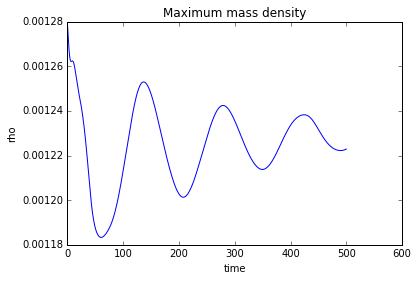

In [72]:
fig, ax = plt.subplots(1,1)
ax.plot(time, rhomax)
ax.set_title('Maximum mass density')
ax.set_xlabel('time')
ax.set_ylabel('rho')
plt.show()

Congratulations! You have setup Cactus, run your first simulation, and visualized some of the results! 